In [ ]:
#Before we start lets install these packages that will be necessary for todays work
    
installed.packages("ggplot2")
installed.packages("dplyr")
installed.packages("reshape2")
installed.packages("knitr")
installed.packages("igraph")

### 1. Decision Trees

Consider a family that has three children. We are interested in the children's genders. Also assume that all eight possible outcomes are equally likely.

What is the sample space? We can tabulate this by writing out all possible combinations
s ={....}

We can also use tree graphs to facilitate the analysis of probabilities. Decision trees are greatly use in machine learning for classification and regression in decision analysis. The basic idea is to be able to generate algorithms that behave in a tree-like structure in order to increase model accuracy by simplifying features from the initial structure (root).

In our previous example we can simplify our conditional probability calculations by using tree graphs.

Lets generate a tree graph in R and solve the last homework problem.

#### To generate the tree graph we must first set the tree structure, we will use the R package igraph, however, there are many other packages for analysis and visualization of tree structures.

In [1]:
#install.packages("igraph")
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
g <- graph.tree(n = 2^4 - 1, children = 2) 
#we need four levels including the root (15 nodes), and each parent having two children

In [3]:
##Lets add the node labels
n_l = c("B","G")
node_labels <- c("",replicate(7,n_l))

### and the edge labels, which in this case will be the probabilities

In [4]:
edge_labels <- c("1/2")
edge_label2 = replicate(14,edge_labels)

### Plot it!

In [10]:
#Assign Color
V(g)$color <- "#C4D8E2"
#V(g)$color[3] <- "white"
#V(g)$color[4] <- "green"

#assign position
coords <- layout_(g, as_tree())
coord2 = matrix(c(-coords[,2],-coords[,1]),ncol = 2)


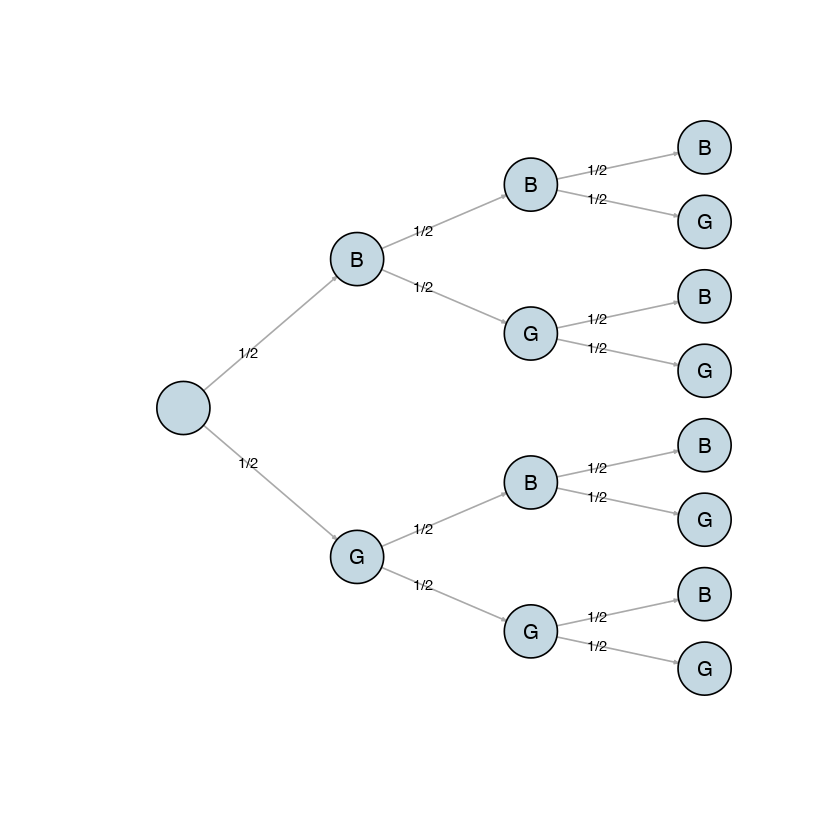

In [6]:
plot(g,
     layout = coord2,           # draw graph as tree
     vertex.size = 20,                  # node size
     vertex.color = V(g)$color,          # node color
     vertex.label = node_labels,        # node labels
     vertex.label.cex = 1,             # node label size
     vertex.label.family = "Helvetica", # node label family
     vertex.label.font = 2,             # node label type (bold)
     vertex.label.color = '#000000',    # node label size
     edge.label = edge_label2,          # edge labels
     edge.label.cex = .7,               # edge label size
     edge.label.family = "Helvetica",   # edge label family
     edge.label.font = 1,               # edge label font type (bold)
     edge.label.color = '#000000',      # edge label color
     edge.arrow.size = 0.2,              # arrow size
     edge.arrow.width = 1              # arrow width
)



Question 1.
What is the probability that the three children are girls given that the first child is a girl?

In this case we have a conditional probability as we already know that the first child is girl (We will start calling it a prior), which means we exclude all of the side where the first child are boys.

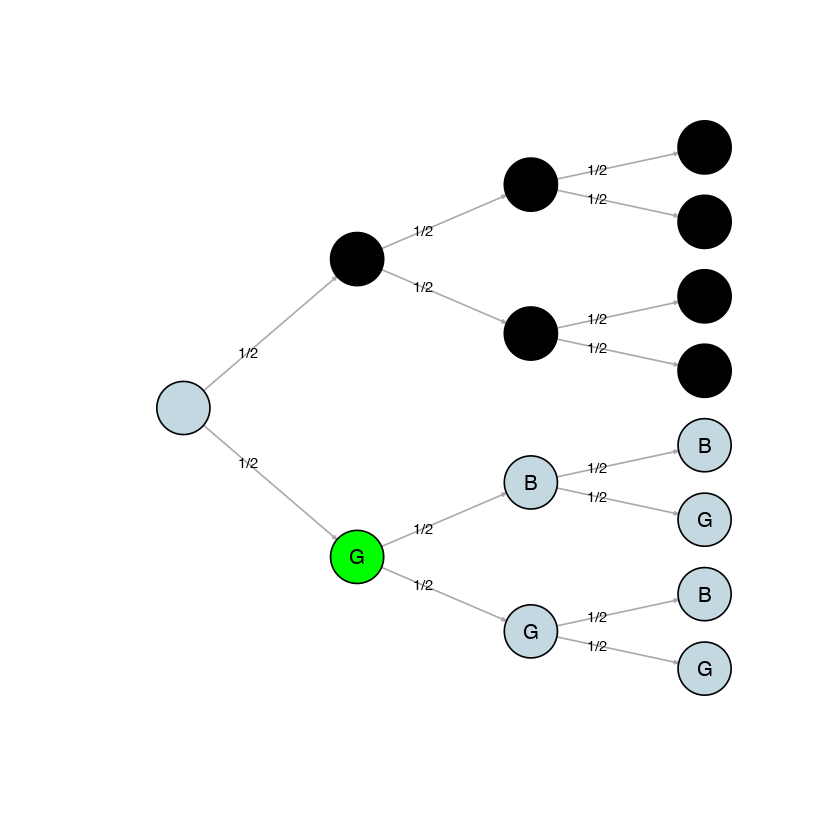

In [11]:
V(g)$color <- "#C4D8E2"
V(g)$color[c(3)] <- "green"
V(g)$color[c(2,4,5,8:11)] <- "black"

plot(g,
     layout = coord2,           # draw graph as tree
     vertex.size = 20,                  # node size
     vertex.color = V(g)$color,          # node color
     vertex.label = node_labels,        # node labels
     vertex.label.cex = 1,             # node label size
     vertex.label.family = "Helvetica", # node label family
     vertex.label.font = 2,             # node label type (bold)
     vertex.label.color = '#000000',    # node label size
     edge.label = edge_label2,          # edge labels
     edge.label.cex = .7,               # edge label size
     edge.label.family = "Helvetica",   # edge label family
     edge.label.font = 1,               # edge label font type (bold)
     edge.label.color = '#000000',      # edge label color
     edge.arrow.size = 0.2,              # arrow size
     edge.arrow.width = 1              # arrow width
)

Which means our sample space has changed, it has only 4 possibilities, thanks to the knowledge from our prior. of these 4 possibilities there is one combination where all children are girls.

Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”

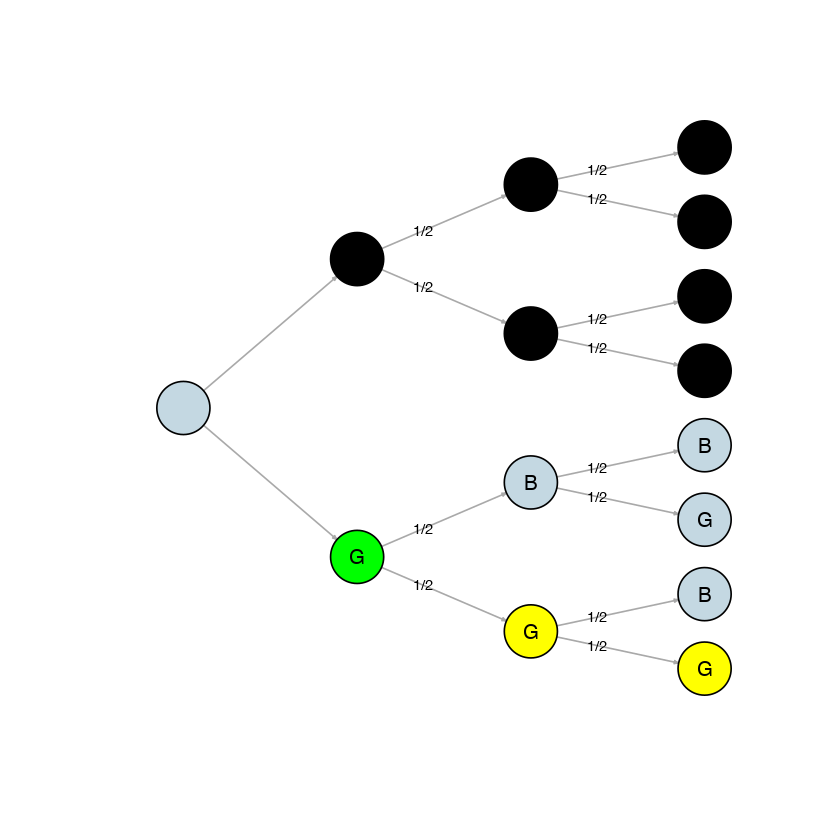

In [12]:
V(g)$edge.labels = replicate(12,c("1/2"))
V(g)$edge.labels[1:2] = ""

V(g)$color <- "#C4D8E2"
V(g)$color[c(2,4,5,8:11)] <- "black"
V(g)$color[c(3)] <- "green"
V(g)$color[c(7,15)] <- "yellow"

plot(g,
     layout = coord2,           # draw graph as tree
     vertex.size = 20,                  # node size
     vertex.color = V(g)$color,          # node color
     vertex.label = node_labels,        # node labels
     vertex.label.cex = 1,             # node label size
     vertex.label.family = "Helvetica", # node label family
     vertex.label.font = 2,             # node label type (bold)
     vertex.label.color = '#000000',    # node label size
     edge.label = V(g)$edge.labels,          # edge labels
     edge.label.cex = .7,               # edge label size
     edge.label.family = "Helvetica",   # edge label family
     edge.label.font = 1,               # edge label font type (bold)
     edge.label.color = '#000000',      # edge label color
     edge.arrow.size = 0.2,              # arrow size
     edge.arrow.width = 1              # arrow width
)



### What is left is simply set the intersection of the two events
### 1/2 * 1/2 = 1/4

We can also calculate this using the conditional probability:
p(A) = The three children are girls = 1/8
p(B) = The first child is a girl = 1/2

p(A|B) = $\frac {P(A \bigcap B)}{P(B)}$

       

$$= \frac{\frac{1}{8}}{\frac{1}{2}}$$

$$= \frac{1}{4}$$